# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points from the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

In [1]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns

RANDOM_SEED = 132419
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("./data/dota2.csv")
color_map = {'Intelligence':'Blue', 'Universal':'Yellow', 'Agility':'Green', 'Strength':'Red'}
toy = df[df['A'].isin(['Agility', 'Strength'])].sample(n=10, random_state=RANDOM_SEED)

# Part 1 Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (25, 12) and (21,20)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


(19.65, 27.35, 9.2, 26.8)

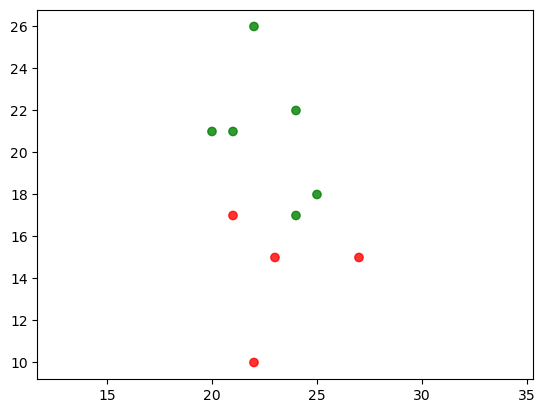

In [2]:
first = 'STR'
last = 'AGI'

X_kmeans = toy[[first, last]]

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.8, c=toy['A'].map(color_map))
plt.axis('equal')

*******************
**YOUR ANSWER HERE**

Using Lloyd's Algorithm.

We assign the points to the cluster with the nearest centroid (using euclidean distance). The class $j$ for point $\mathbf{x}$ can be assigned by (for 2 dimensions):

$$
j = \arg \min_{i} || \mathbf{x} - \mathbf{\mu}_i || =  \arg \min_{i}  \sqrt{(x_1 - \mu_{i, 1})^2 + (x_2 - \mu_{i, 2})^2}
$$

As an example, we use the point $\mathbf{x} = $ `(21, 21)`. The cluster with centroid in (25, 12) is named cluster 1, and cluster with centroid in (21, 20) is named clutser 2.

\begin{aligned}
\text{Distance to Cluster 1} = \sqrt{(25 - 21)^2 + (12 - 21)^2} \approx 9.85; && \text{Distance to Cluster 2} = \sqrt{(21 - 21)^2 + (20 - 21)^2} = 1.0
\end{aligned}

Since cluster 2 with centroid (21, 20) has the smallest distance to $\mathbf{x}$, $\mathbf{x}$ is assigned to cluster 2.

The remaining points are assigned using the same method. Computations are omitted.



\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 9.85 & 1.0 \\
(27, 15) & \text{Cluster 1} & 3.61 & 7.81 \\
(22, 10) & \text{Cluster 1} & 3.61 & 10.05 \\
(25, 18) & \text{Cluster 2} & 6.0 & 4.47 \\
(24, 17) & \text{Cluster 2} & 5.10 & 4.24 \\
(24, 22) & \text{Cluster 2} & 10.05 & 3.61 \\
(23, 15) & \text{Cluster 1} & 3.61 & 5.39 \\
(20, 21) & \text{Cluster 2} & 10.3 & 1.41 \\
(21, 17) & \text{Cluster 2} & 6.4 & 3.0 \\
(22, 26) & \text{Cluster 2} & 14.32 & 6.08 \\
\end{array}


With the points assigned, we compute the new centroids for each cluster. The centroids are computed using: 

$$
\mathbf{\mu}_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x}
$$

As an example we will compute the centroid for cluster 1

$$
\mathbf{\mu}_1 = \frac{1}{3} \left( \begin{pmatrix} 27 \\ 15 \end{pmatrix} + \begin{pmatrix} 22 \\ 10 \end{pmatrix} + \begin{pmatrix} 23 \\ 15 \end{pmatrix} \right) = \frac{1}{3} \begin{pmatrix} 27 \\ 40 \end{pmatrix} =  \begin{pmatrix} 24.0 \\ 13.33 \end{pmatrix} 
$$

Computations for cluster 2 are omitted, but follow the same procedure. The new centroid for clutser 2 is 
$$
\mathbf{\mu}_2 = \begin{pmatrix} 22.43 \\ 20.29 \end{pmatrix}
$$

With the new centroids, we re-compute the cluster assignment of the points using the same method as before. The new assignments are:

\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 8.23 & 1.6 \\
(27, 15) & \text{Cluster 1} & 3.43 & 6.99 \\
(22, 10) & \text{Cluster 1} & 3.89 & 10.29 \\
(25, 18) & \text{Cluster 2} & 4.77 & 3.44 \\
(24, 17) & \text{Cluster 2} & 3.67 & 3.64 \\
(24, 22) & \text{Cluster 2} & 8.67 & 2.33 \\
(23, 15) & \text{Cluster 1} & 1.94 & 5.32 \\
(20, 21) & \text{Cluster 2} & 8.65 & 2.53 \\
(21, 17) & \text{Cluster 2} & 4.74 & 3.58 \\
(22, 26) & \text{Cluster 2} & 12.82 & 5.73 \\
\end{array}

As the cluster assignment has not changed, neither will the centroid coordinates and the algorithm has converged. The above cluster assignment is the final assignment.

******************

In [3]:
initial_centroids = np.array([[25, 12], [21, 20]])

# Create KMeans object with 2 clusters and initialize centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids)

# Fit the KMeans model to your data
kmeans.fit(X_kmeans)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print results
print("Cluster Assignments:", cluster_assignments + 1)
print("Final Centroids:", centroids)

Cluster Assignments: [2 1 1 2 2 2 1 2 2 2]
Final Centroids: [[24.         13.33333333]
 [22.42857143 20.28571429]]


Point Assignments:
[2 1 1 2 2 2 1 2 2 2]


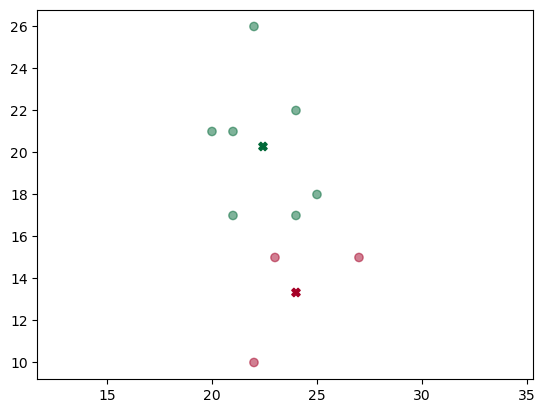

In [4]:
points = np.array(X_kmeans)

centroid1 = np.array([25, 12])
centroid2 = np.array([21, 20])
distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])

assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

centroid1 = np.mean(np.array(X_kmeans)[np.where(assignments == 1)], axis=0)
centroid2 = np.mean(np.array(X_kmeans)[np.where(assignments == 2)], axis=0)

distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])
assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.5, c=assignments, cmap='RdYlGn')
plt.scatter([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')

plt.savefig('figures/task1.1.1.png')

print("Point Assignments:")
print(assignments)

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************

##### Example 1

Using the previous task as an example, if we initate the centroids with following coordinates, we end up with a different final clustering: 
$$
\begin{align*}
\mathbf{\mu}_1 = \begin{pmatrix} 25 \\ 16 \end{pmatrix} && \mathbf{\mu}_2 = \begin{pmatrix} 21 \\ 24 \end{pmatrix}
\end{align*}
$$

Using the same algorithm/approach as shown in task 1.1.1, we get the following cluster assignment using the initial centroids: 


\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 6.4 & 3.0 \\
(27, 15) & \text{Cluster 1} & 2.24 & 10.82 \\
(22, 10) & \text{Cluster 1} & 6.71 & 14.04 \\
(25, 18) & \text{Cluster 1} & 2.0 & 7.21 \\
(24, 17) & \text{Cluster 1} & 1.41 & 7.62 \\
(24, 22) & \text{Cluster 2} & 6.08 & 3.61 \\
(23, 15) & \text{Cluster 1} & 2.24 & 9.22 \\
(20, 21) & \text{Cluster 2} & 7.07 & 3.16 \\
(21, 17) & \text{Cluster 1} & 4.12 & 7.0 \\
(22, 26) & \text{Cluster 2} & 10.44 & 2.24 \\
\end{array}

Using the cluster assignment, we reevaluate our centroid values and get the following: 

$$
\begin{align*}
\mathbf{\mu}_1 = \begin{pmatrix} 23.67 \\ 15.33 \end{pmatrix} && \mathbf{\mu}_2 = \begin{pmatrix} 21.75 \\ 22.5 \end{pmatrix}
\end{align*}
$$

Once again, we compute the cluster assignment using the new points:

\begin{array}{cccccc}
\text{Point} & \text{Cluster Assignment} & \text{Distance to Cluster 1} & \text{Distance to Cluster 2} \\
\hline
(21, 21) & \text{Cluster 2} & 6.26 & 1.68 \\
(27, 15) & \text{Cluster 1} & 3.35 & 9.15 \\
(22, 10) & \text{Cluster 1} & 5.59 & 12.5 \\
(25, 18) & \text{Cluster 1} & 2.98 & 5.55 \\
(24, 17) & \text{Cluster 1} & 1.7 & 5.94 \\
(24, 22) & \text{Cluster 2} & 6.67 & 2.3 \\
(23, 15) & \text{Cluster 1} & 0.75 & 7.6 \\
(20, 21) & \text{Cluster 2} & 6.75 & 2.3 \\
(21, 17) & \text{Cluster 1} & 3.14 & 5.55 \\
(22, 26) & \text{Cluster 2} & 10.8 & 3.51 \\
\end{array}

Since the cluster assignmet hasn't changed, neither will the centroid values. Hence our algorithm has converged.
As shown, we get a different clustering than in the previous task.




second iter: [2 1 1 1 1 2 1 2 1 2], [[ 6.4   3.  ]
 [ 2.24 10.82]
 [ 6.71 14.04]
 [ 2.    7.21]
 [ 1.41  7.62]
 [ 6.08  3.61]
 [ 2.24  9.22]
 [ 7.07  3.16]
 [ 4.12  7.  ]
 [10.44  2.24]], C1: [23.66666667 15.33333333], C2: [21.75 22.5 ]


Point Assignments:
[2 1 1 1 1 2 1 2 1 2]


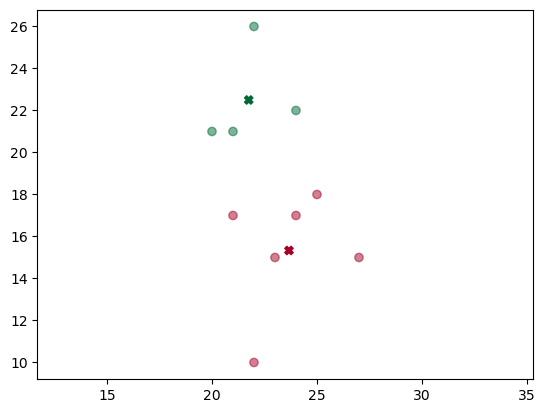

In [5]:
points = np.array(X_kmeans)

centroid1 = np.array([25, 16])
centroid2 = np.array([21, 24])
distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])

assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1

centroid1 = np.mean(np.array(X_kmeans)[np.where(assignments == 1)], axis=0)
centroid2 = np.mean(np.array(X_kmeans)[np.where(assignments == 2)], axis=0)


print(f"second iter: {assignments}, {distances.T.round(2)}, C1: {centroid1}, C2: {centroid2}")

distances = np.array([np.linalg.norm(points - centroid1, axis=1), np.linalg.norm(points - centroid2, axis=1)])
assignments = np.argmin(np.array([np.linalg.norm(points - centroid1, axis=1),
                                  np.linalg.norm(points - centroid2, axis=1)]), axis=0) + 1


plt.scatter(X_kmeans[first], X_kmeans[last], alpha=0.5, c=assignments, cmap='RdYlGn')
plt.scatter([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')

plt.savefig('figures/task1.1.2_example1.png')

print("Point Assignments:")
print(assignments)

In [6]:
initial_centroids = np.array([[25, 16], [21, 24]])

# Create KMeans object with 2 clusters and initialize centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids)

# Fit the KMeans model to your data
kmeans.fit(X_kmeans)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids[:,0])
# Print results
print("Cluster Assignments:", cluster_assignments + 1)
print("Final Centroids:", centroids)

[23.66666667 21.75      ]
Cluster Assignments: [2 1 1 1 1 2 1 2 1 2]
Final Centroids: [[23.66666667 15.33333333]
 [21.75       22.5       ]]


##### Example 2

As a very simple example, we have a one dimensional data set consisting of the points (1, 2, 4, 6, 8, 9, 10, 12)

We compute to different assigments using two different cluster initializations:

Centroid 1 = 2, centroid 2 = 9

Centroid 1 = 5, centroid 2 = 10


Cluster assigment using euclidean distance in one dimension becomes:

$$
j =   \arg \min_{i}  |x - \mu_{i, 1}|
$$

Using the measure above, we get the following assigments for the data points:
$$
\begin{array}{|cccccc|}
\text{Point} & \text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
1 & \text{Cluster 1} & 1 & 8 \\
2 & \text{Cluster 1} & 0 & 7 \\
4 & \text{Cluster 1} & 2 & 5 \\
6 & \text{Cluster 2} & 4 & 3 \\
8 & \text{Cluster 2} & 6 & 1 \\
9 & \text{Cluster 2} & 7 & 0 \\
10 & \text{Cluster 2} & 8 & 1 \\
12 & \text{Cluster 2} & 10 & 3 \\
\end{array} \quad 

\begin{array}{|cccccc|}
\text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
\text{Cluster 1} & 4 & 9 \\
\text{Cluster 1} & 3 & 8 \\
\text{Cluster 1} & 1 & 6 \\
\text{Cluster 1} & 1 & 4 \\
\text{Cluster 2} & 3 & 2 \\
\text{Cluster 2} & 4 & 1 \\
\text{Cluster 2} & 5 & 0 \\
\text{Cluster 2} & 7 & 2 \\
\end{array}
$$

Updating the cluster centroids for the different initializations, we get: 

Centroid 1 = 2.33, centroid 2 = 9

Centroid 1 = 3.25, centroid 2 = 9.75

Re-computing the cluster assignments, we obtain: 

$$
\begin{array}{|cccccc|}
\text{Point} & \text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
1 & \text{Cluster 1} & 1.33 & 8 \\
2 & \text{Cluster 1} & 0.33 & 7 \\
4 & \text{Cluster 1} & 1.67 & 5 \\
6 & \text{Cluster 2} & 3.67 & 3 \\
8 & \text{Cluster 2} & 5.67 & 1 \\
9 & \text{Cluster 2} & 6.67 & 0 \\
10 & \text{Cluster 2} & 7.67 & 1 \\
12 & \text{Cluster 2} & 9.67 & 3 \\
\end{array} \quad 

\begin{array}{|cccccc|}
\text{Cluster Assignment} & \text{Dist. to Cluster 1} & \text{Dist. to Cluster 2} \\
\hline
\text{Cluster 1} & 2.25 & 8.75 \\
\text{Cluster 1} & 1.25 & 7.75 \\
\text{Cluster 1} & 0.75 & 5.75 \\
\text{Cluster 1} & 2.75 & 3.75 \\
\text{Cluster 2} & 4.75 & 1.75 \\
\text{Cluster 2} & 5.75 & 0.75 \\
\text{Cluster 2} & 6.75 & 0.25 \\
\text{Cluster 2} & 8.75 & 2.25 \\
\end{array}
$$

As shown above, the cluster assignment has not changed, and so our algorithm has converged.
The two initilizations result in different clusterings, where the assignment of the point $x=6$ depends on the initialization.

******************

[-10  -9  -7  -5  -3  -2  -1   1]
Cluster Assignments: [1 1 1 1 2 2 2 2]
Final Centroids: [[3.25]
 [9.75]]


(0.44999999999999996, 12.55, 0.945, 1.0550000000000002)

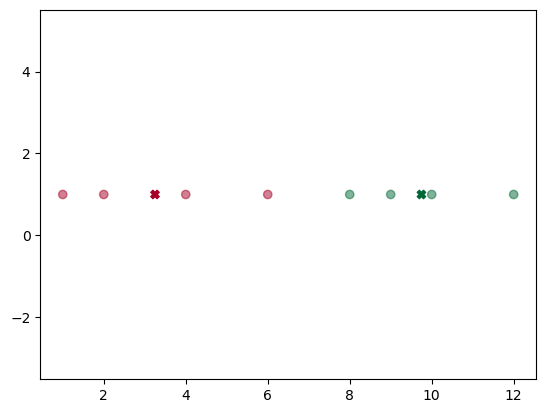

In [7]:
X_1d_1 = np.array([1, 2, 4, 6, 8, 9, 10, 12])

print(X_1d_1 - 11)
 
X_1d_2 = np.ones_like(X_1d_1)

initial_centroids = np.array([[8], [12]])

kmeans = KMeans(n_clusters=2, init=initial_centroids)

# Fit the KMeans model to your data
kmeans.fit(X_1d_1.reshape(-1, 1))


# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_
# Print results
print("Cluster Assignments:", cluster_assignments + 1)
print("Final Centroids:", centroids)

plt.scatter(X_1d_1, X_1d_2, alpha=0.5, c=cluster_assignments, cmap='RdYlGn')
plt.scatter(centroids, np.ones_like(centroids), alpha = 1, marker='X', c=[3, 4], label='Centroids', cmap='RdYlGn')
plt.axis('equal')


<span style='color: green'>**\[Motivate\]**</span> <br>
B) How do you explain the difference between the two cluster assignments in point A)?

*******************
Kmeans result in different clusterings due to the algorithm converging to different local minima, which depends on initalization. As seen by the examples, even though there may be a more optimal clustering that would globally minimize the distances from points to clusters, the algorithm seeks out to minimize the objective function by 'simply' assigning a point to the nearest cluster. So even if an optimal solution exists by assigning points that are further away to the cluster and moving the centroid significantly, this will not happen if this assingment includes temporarily assigning a point to a cluster that is not the immediate nearest. 
******************

### Task 1.1.3 (4 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering DBSCAN for the dataset of Task 1.1.1 using $\epsilon=3.5$ and $MinPts=2$. Present at least 2 iterations of the algorithm.<br> 


*******************
**YOUR ANSWER HERE**
******************


B) <span style='color: green'>**\[Motivate\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1.

*******************
**YOUR ANSWER HERE**
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Motivate\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [ ] Depth based approach

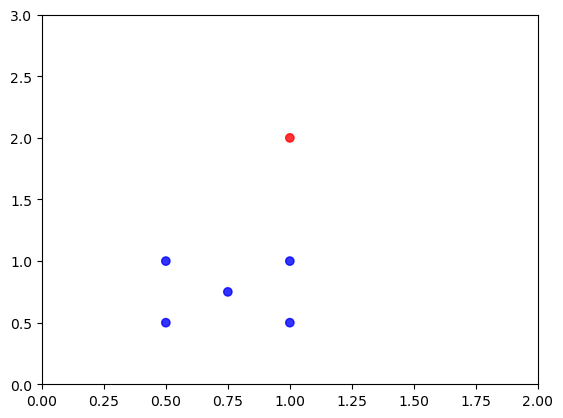

In [8]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
**YOUR ANSWER HERE**
******************

## Task 1.3 Theoretical questions
### Task 1.3.1 Triangle inequality (2 points)
<span style='color: green'>**\[Prove\]**</span> 1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Prove\]**</span> 2. If $d(p_1,p_2)\leq\frac{d(p_2,p_3)}{2}$, then $d(p_1,p_2)\leq(p_1,p_3)$

*******************
**YOUR ANSWER HERE**
******************

### Task 1.3.2 Kernel trick (9 points)
<span style='color: green'>**\[Motivation\]**</span> A) What is a positive-definite kernel $K(x,x')$ of two vectors $x,x'\in\mathbb{R}^n$. 

*******************
$K$ is a positive semidefinite kernel of two vectors if and only if it is symmetric, ie:

$$
\begin{align}
\tag{1}
K(\mathbf{x}_i, \mathbf{x}_j) = K(\mathbf{x}_j, \mathbf{x}_i)
\end{align} 
$$

and if the corresponding kernel matrix $\mathbf{K}$ evaluated on any set of points in the input space is positive definte, that is
$$
\mathbf{a}^T \mathbf{K}\mathbf{a} \geq 0 \text{ for all vectors } \mathbf{a} \in \R^n
$$ 
which implies: 

$$
\begin{align}
\tag{2}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K(\mathbf{x}_i, \mathbf{x}_j) \geq 0, \quad \text{for all } a_i \in \R, i \in [1, n] 
\end{align}
$$

******************

<span style='color: green'>**\[Motivate\]**</span> B) Please explain briefly what is the kernel trick method.

*******************
                                                                
Instead of working with the original input features of the data, the kernel trick method consists of transforming the data by a kernel function andrepresenting the data by a kernel matrix $\mathbf{K}$, and using the kernel matrix for all relevant analysis.

******************

<span style='color: green'>**\[Prove\]**</span> C)
Let two positive-definite kernels $K_1(x,x')$ and $K_2(x,x')$.  <br> Show that functions $K_1(x,x')+K_2(x,x')$ and $K_1(x,x')K_2(x,x')$ are also positive-definite kernels.

*******************

Since $K_1$ and $K_2$ individually satisfy the properties of a positive-definite kernel, ie:

$$
\begin{aligned}
\tag{3}
K(x, x') = K(x', x), && \quad \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K(\mathbf{x}_i, \mathbf{x}_j) \geq 0, \quad \text{for all } a_i \in \R, i \in [1, n]
\end{aligned}
$$
For both $K_1$ and $K_2$, we can show that the sum of two positive definite kernels will also be symmetric. We define $K_s(x, x')$ as the sum, whereby we get:

$$
\begin{aligned}
K_s(x,x') = K_1(x, x') + K_2(x, x') = K_1(x', x) + K(x', x) = K_s(x', x)
\end{aligned}
$$

By using the symmetry of the individual kernels. Moreover we can show the kernel sum $K_s(x, x')$ will also be positive definite by: 

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_s(\mathbf{x}_i, \mathbf{x}_j)  
    &= \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) + K_2(\mathbf{x}_i, \mathbf{x}_j) \right) \\
    &=\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j  K_1(\mathbf{x}_i, \mathbf{x}_j) + \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j  K_2(\mathbf{x}_i, \mathbf{x}_j)
\end{aligned}
$$

Since both $K_1$ and $K_2$ are positive definite as shown in eq. (3), both terms on the right hand side are non-negative, and therefore the sum will also be non-negative, meaning: 
$$
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_s(\mathbf{x}_i, \mathbf{x}_j) \geq 0
$$

Likewise for the product of two kernels, we can show this produces as symmetric kernel, $K_p$:

$$
\begin{aligned}
K_p(x, x') = K_1(x, x')\cdot K_2(x, x') = K_1(x', x)  \cdot K_2(x', x) = K_p(x', x)
\end{aligned}
$$

Since $K_1$ and $K_2$ are symmetric, and the scalar product is a symmetric operator, we get that $K_p$, the product between two kernels is also symmetric. 

Next, we can show that the product of two positive definite kernels is also positve definite:

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j)  
    &= \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j) \right) 
\end{aligned}
$$

Since both $K_1$ and $K_2$ are positive definite kernels, the product $K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j)$ will also be positive definite/non-negative. The sum of many non-negative terms will also be non-negative, and so we obtain: 

$$
\begin{aligned}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j)  = \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j \left( K_1(\mathbf{x}_i, \mathbf{x}_j) \cdot K_2(\mathbf{x}_i, \mathbf{x}_j) \right)  \geq 0
\end{aligned}
$$

******************

<span style='color: green'>**\[Prove\]**</span> D) Prove that $K(x,x')=e^{2 ln(x^{\top}x')-(x-x')^{\top}(x-x')}$ is a positive-definite kernel. 

*******************
Firstly, it can be seen that the kernel is symmetric. By slighty re-writing the kernel function, we obtain: 

$$
\begin{align}
K(x, x') = e^{2 \ln (x^T x')} e^{-(x-x')^T(x-x')}
\end{align}
$$
Where the product $x^T x'$ is symmetric, since the dot prodyct is symmetric, hence $\ln (x^T x') = \ln (x'^T x)$ will also be symmetric, and the first term will be symmetric.

Moreover the second term, $(x-x')^T(x - x')$ is symmetric due to being a square product, meaning $(x-x')^T(x - x') = (x'-x)^T(x' - x)$. And so the second term is also symmetric. As shown in the previous task, the product of symmetric kernels will result in a symmetric kernel. 

By further simplyfying the kernel function, we get:
$$
\begin{align}
K(x, x') &= e^{2 \ln (x^T x')} e^{-(x-x')^T(x-x')} \\
    &= (x^Tx')^2 e^{-(x-x')^T(x-x')}
\end{align}
$$

to prove the kernel is positve definite, we must then show that

$$
\begin{align}
\sum^n_{i = 1} \sum^n_{j = 1} a_i a_j K_p(\mathbf{x}_i, \mathbf{x}_j) = \sum^n_{i = 1} \sum^n_{j = 1} a_i a_j (x^Tx')^2 e^{-(x-x')^T(x-x')} \geq 0
\end{align}
$$

holds true. It can bee seen that the term $(x^Tx')^2$ is squared and therefore always non-negative. The remaning term $e^{-(x-x')^T(x-x')}$ is an exponential function, that can never be zero nor negative. 
Hence the kernel is a product of two non-negative terms, and therefore will be positive definite. 

******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about dota2 heroes check ```datatainfo.md``` for more infomation. 

In [10]:
toy = df
data_np = toy.to_numpy()
headers = ['HERO','A','STR','STR+','STR30','AGI','AGI+','AGI30','INT','INT+','INT30','T','T+','T30','MS','AR','DMG_MIN','DMG_MAX','RG','AS','BAT','ATK_PT','ATK_BS','VS-D','VS-N','TR','COL','HP/S','MP/S','Complexity','Legs','Release','Artifact']
X = data_np[:,2:]
y = data_np[:,1]
rows, cols = np.shape(X)
toy.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,VS-D,VS-N,TR,COL,HP/S,MP/S,Complexity,Legs,Release,Artifact
0,Abaddon,Universal,22,2.2,85.8,23,1.3,60.7,19,1.6,...,1800,800,0.6,27,3.20,1.20,1,2,2005,1
1,Alchemist,Strength,23,2.7,101.3,22,1.5,65.5,25,1.8,...,1800,800,0.6,27,2.55,1.25,1,2,2006,0
2,Ancient Apparition,Intelligence,20,1.9,75.1,20,2.2,83.8,23,3.1,...,1800,800,0.6,27,2.25,1.15,2,0,2009,0
3,Anti-Mage,Agility,19,1.6,65.4,24,2.8,105.2,12,1.8,...,1800,800,0.6,27,2.65,0.60,1,2,2004,0
4,Arc Warden,Agility,22,2.6,97.4,20,3.0,107.0,24,2.6,...,1800,800,0.7,27,2.45,1.20,3,2,2012,0


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

In [11]:
def correlation_matrix(X):
    corr = None
    # YOUR CODE HERE
    
    
    
    # YOUR CODE HERE 
    return corr
    
X = data_np
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()

ValueError: not enough values to unpack (expected 2, got 0)

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in A), which pair(s) of different features has the highest correlation?

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two features are highly correlated? <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the features of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below. (You may need to zoom on it)
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [ ] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

In [ ]:
df_to_plot = df.drop(['HERO','A'],axis=1)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_to_plot.corr(),annot=True,linewidths=1, cmap="YlGnBu", annot_kws={"fontsize":10}, vmax=1, ax=ax)
plt.title('Correlation')
plt.show()

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the dota2 dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [ ]:
# Data
X = data_np

# YOUR CODE HERE


# YOUR CODE HERE

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Motivate\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable within the matrix.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other within the matrix. 
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>Do NOT just choose an answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [ ]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [ ]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Motivate\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

In [ ]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape
print(headers, X.shape)
fig = plt.figure(constrained_layout=True, figsize=(8, 50))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(2,n):
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [ ]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()

In [ ]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>You can use the KMeans implementation from scikit-learn.</font> <br>

In [ ]:
# Data
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 

In [ ]:
toy = df[df['A'].isin(['Strength', 'Intelligence', 'Universal'])]
first = "STR30"
second = "T+"
init=[[-1,-1],[1,2]]

X = toy[[first, second]].to_numpy()

# Data normalization
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.2): 
    k = 0 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return k


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, init=[[-1,-1],[1,2]], iters=100, error=0): 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return clusters

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, SOME_AMOUNT_OF_CLUSTERS)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)

NameError: name 'SOME_AMOUNT_OF_CLUSTERS' is not defined

### Task 3.1.4 (1 points)
<span style='color: green'>**\[Motivate\]**</span> Run both kmeans and kernel K-means on data. (with a given init)
which method is better at isolating universal classified heroes and why?

In [ ]:
init=[[-1,-1],[1,2]]
kmeans = KMeans(n_clusters=2,init=init).fit(X_norm)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=kmeans.labels_)

In [ ]:
clusters = kernel_kmeans(X_norm, 2, init=init)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

*******************
**YOUR ANSWER HERE**
******************


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $T$ **given** $C$ is given by: 
$$\text{CE}(T|C)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [ ]:
def entropy(C):
    # Let C be a list of clusters
    entropy = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return entropy


def CE(C1, C2):
    ce = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return ce

### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Print the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. <br>

In [ ]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()
###YOUR CODE HERE


###YOUR CODE HERE
class_labels = np.array(toy["A"])

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [ ]:
### YOUR CODE HERE
T = np.array([]) # Ground-truth clusters
C = np.array([]) # Clusters obtained by k-means
### YOUR CODE HERE

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return purity

print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Print the purity of the clusters obtained by k-means in Task 3.1.1. 


In [ ]:
toy = df[df['A'].isin(['Universal', 'Intelligence'])]
first = "T+"
second = "INT+"
X = toy[[first, second]].to_numpy()
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [ ] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
**YOUR ANSWER HERE**
******************

## Task 3.3 Gaussian Mixtures and the EM-Algorithm
### Task 3.3.1 (6 point)
<span style='color: green'>**\[Implement\]**</span> the EM-algorithm for the Gaussian Mixture Model.
<br> You can consult [DMA] Section 13.3.2, for a description of how the algorithm works in this particular setup.

In [ ]:
from utilities.gmm import GMM
class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for mu, Sigma, and pi.
            
            The function corresponds to line 2-4 in Algorithm 13.3 in [DMA, p. 349]
            Note, that K can be retrieved as `self.K`.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size     [K, d, d]
                    pi has size        [K]
        """
        # TODO: what should the values be for initializing mu, Sigma and pi
        return mu, Sigma, pi


    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(Y|X)

            This function corresponds to line 8 in Algorithm 13.3 in [DMA, p. 349]
            Note, that mean and covariance matrices can be accessed by `self.mu` and `self.Sigma`, respectively.
            
            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """
        # TODO: what is the posterior probability?
        
        return posterior
        

    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the data `X` and the current
            posterior probabilities `P`.

            This function corresponds to line 10-12 in Algorithm 13.3 and Eqn. (13.11-13) in [DMA, p. 349].
            
            Args:
                X (matrix, [n, d]): Data matrix
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what is the values of mu, Sigma, and pi that maximizes the expectation given the posterior?
        return  mu_hat, Si_hat, pi_hat



### Task 3.3.2 (2 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run your EM-algorithm for GaussianMixtures<br> 

In [ ]:
toy = df[df['A'].isin(['Intelligence', 'Strength'])]
first = "T+"
second = "STR+"

labels = toy[['A']].to_numpy()
labels = np.unique(labels, return_inverse=True)[1]
X = toy[[first, second]].to_numpy()
X_norm = (X - X.min(0)) / X.ptp(0)


clusters = None
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

<span style='color: green'>**\[Motivate\]**</span><br>
B) What are the advantages and disadvantages of this approach?<br> 

*******************
**YOUR ANSWER HERE**
******************

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [ ]:
toy = df[df['A'].isin(['Intelligence', 'Strength'])]
first = "T+"
second = "STR+"
X = toy[[first, second]].to_numpy()

X_norm = (X - X.min(0)) / X.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [ ]:
def DBOutliers(X, eps, pi): 
    outliers = None
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR CODE ENDS HERE
    return outliers

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [ ]:
def tune_dboutliers(X): 
    eps = 0
    pi = 0
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR ENDS CODE HERE
    return eps, pi

B) <span style='color: green'>**\[Motivate\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Motivate\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

In [ ]:
### YOUR CODE HERE 

*******************
**YOUR ANSWER HERE**
******************